In [147]:
import pandas as pd
import seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from minisom import MiniSom 
from matplotlib.pyplot import plot,axis,show,pcolor,colorbar,bone

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)
%matplotlib inline
originalData = pd.read_csv("tomslee_airbnb_new_york_1196_2017-05-06.csv")
originalData = originalData[[ 'room_type','borough','accommodates', 'reviews', 'overall_satisfaction', 'bedrooms',
                          'price', 'longitude','latitude','property_type']]


originalData = originalData[originalData.overall_satisfaction.map(lambda x:not math.isnan(x))]
originalData = originalData[originalData.reviews.map(lambda x:x is not 0)]
originalData = originalData[originalData.price.map(lambda x: x<2000)]
originalData.reset_index(drop = True, inplace=True)
display(originalData.describe())
display(originalData.head())

,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude
count,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000
mean,2.900296,21.480984,3.544215,1.155692,134.167448,-73.955580,40.730862
std,1.850856,32.829213,2.041815,0.707444,113.330492,0.041488,0.053658
min,1.000000,1.000000,0.000000,0.000000,10.000000,-74.239859,40.508684
25%,2.000000,3.000000,3.500000,1.000000,68.000000,-73.983928,40.691726
50%,2.000000,8.000000,4.500000,1.000000,100.000000,-73.957256,40.724432
75%,4.000000,26.000000,5.000000,1.000000,165.000000,-73.940227,40.764837
max,16.000000,432.000000,5.000000,10.000000,1999.000000,-73.708097,40.908039


,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
0,Shared room,Manhattan,5,3,4.5,1.0,240.0,-73.956041,40.772774,Apartment
1,Shared room,Manhattan,2,4,5.0,1.0,110.0,-73.954550,40.771820,Apartment
2,Shared room,Manhattan,2,3,5.0,1.0,105.0,-73.943941,40.780694,Apartment
3,Shared room,Manhattan,3,7,4.5,1.0,114.0,-73.943762,40.786761,Apartment
4,Shared room,Brooklyn,2,1,0.0,1.0,99.0,-73.982937,40.694308,Apartment


In [148]:
print(originalData.columns)
display(originalData.describe())
display(originalData['borough'].value_counts())
display(originalData['room_type'].value_counts())
display(originalData['property_type'].value_counts())

Index(['room_type', 'borough', 'accommodates', 'reviews',
       'overall_satisfaction', 'bedrooms', 'price', 'longitude', 'latitude',
       'property_type'],
      dtype='object')


,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude
count,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000,31132.000000
mean,2.900296,21.480984,3.544215,1.155692,134.167448,-73.955580,40.730862
std,1.850856,32.829213,2.041815,0.707444,113.330492,0.041488,0.053658
min,1.000000,1.000000,0.000000,0.000000,10.000000,-74.239859,40.508684
25%,2.000000,3.000000,3.500000,1.000000,68.000000,-73.983928,40.691726
50%,2.000000,8.000000,4.500000,1.000000,100.000000,-73.957256,40.724432
75%,4.000000,26.000000,5.000000,1.000000,165.000000,-73.940227,40.764837
max,16.000000,432.000000,5.000000,10.000000,1999.000000,-73.708097,40.908039


Manhattan        14698
Brooklyn         12723
Queens            3033
Bronx              485
Staten Island      193
Name: borough, dtype: int64

Entire home/apt    15954
Private room       14348
Shared room          830
Name: room_type, dtype: int64

Apartment             26499
House                  2798
Loft                    677
Townhouse               454
Condominium             268
Other                   157
Bed & Breakfast         131
Guesthouse               32
Timeshare                23
Hostel                   19
Villa                    15
Bungalow                 12
Dorm                     12
Boutique hotel           10
Serviced apartment        5
Boat                      4
Guest suite               4
Cabin                     3
Castle                    2
Cave                      1
Vacation home             1
In-law                    1
Chalet                    1
Lighthouse                1
Hut                       1
Earth House               1
Name: property_type, dtype: int64

In [149]:
sampledData = originalData.sample(frac=0.1).reset_index(drop=True)
usefulData = sampledData.sample(frac=1).reset_index(drop=True)
broughChosen = ['Manhattan', 'Brooklyn']
data = usefulData[usefulData['borough'].map(lambda x: x in broughChosen)]

In [150]:
display(data.head())

,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
1,Entire home/apt,Manhattan,4,72,4.5,2.0,195.0,-73.987723,40.720270,Apartment
2,Private room,Brooklyn,1,73,4.5,1.0,84.0,-73.962531,40.713996,Apartment
3,Private room,Brooklyn,2,5,5.0,1.0,80.0,-73.942833,40.705396,Apartment
4,Private room,Brooklyn,3,1,0.0,1.0,69.0,-73.937552,40.713160,House
8,Entire home/apt,Manhattan,2,10,4.5,2.0,200.0,-74.001367,40.728629,Apartment


,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
0,Entire home/apt,Manhattan,4,72,4.5,2.0,195.0,-73.987723,40.720270,Apartment
1,Private room,Brooklyn,1,73,4.5,1.0,84.0,-73.962531,40.713996,Apartment
2,Private room,Brooklyn,2,5,5.0,1.0,80.0,-73.942833,40.705396,Apartment
3,Private room,Brooklyn,3,1,0.0,1.0,69.0,-73.937552,40.713160,House
4,Entire home/apt,Manhattan,2,10,4.5,2.0,200.0,-74.001367,40.728629,Apartment


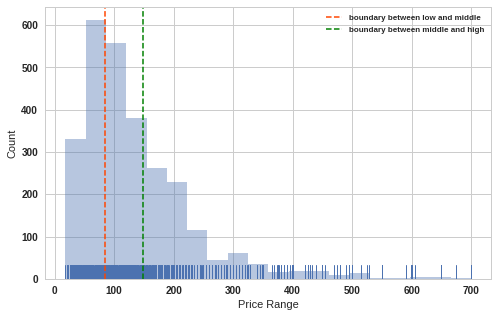

In [151]:
# view the distribution of price for the labeling later
tmp = data[data.price.map(lambda x: x<750)]
pricePlt = sns.distplot(tmp['price'].sort_values(), bins=20, kde=False, rug=True)
pricePlt.set_xlabel('Price Range')
pricePlt.set_ylabel('Count')
pricePlt.figure.set_size_inches(8,5)
plt.axvline(x = 85, linewidth=1.5, color = 'orangered',linestyle="--", label = 'boundary between low and middle')
plt.axvline(x = 149, linewidth=1.5, color = 'green',linestyle="--", label = 'boundary between middle and high')
plt.legend(loc = 'upper right',prop={'size':8})
data.reset_index(drop = True, inplace=True)
display(data.head())

In [152]:
lableLow = data['price'].map(lambda x: x <85)
lableMid = data['price'].map(lambda x: x<=149 and x >= 85)
lableHigh = data['price'].map(lambda x: x >149)
print(lableLow.value_counts(),lableMid.value_counts(), lableHigh.value_counts())
p1_price = data['price']
data_p1 = data.drop(axis=1,labels=['price'])

False    1843
True      884
Name: price, dtype: int64 False    1858
True      869
Name: price, dtype: int64 False    1753
True      974
Name: price, dtype: int64


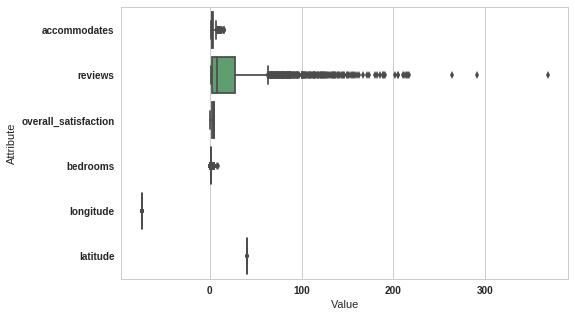

In [153]:
data_p1_coded = pd.get_dummies(data_p1)
sns.set_style("whitegrid")
plot = sns.boxplot(data=data_p1_coded.iloc[:,0:6], orient='h')
plot.set_yticklabels(data_p1_coded.columns);
plot.set_xlabel('Value')
plot.set_ylabel('Attribute')
plot.figure.set_size_inches(8,5)

In [154]:
data1 = np.array(data_p1_coded)
display(data_p1_coded.tail().iloc[:3,:9])
x = (data1-data1.mean(axis=0))/data1.std(axis=0)
tmp = pd.DataFrame(x)
display(tmp.head())

,accommodates,reviews,overall_satisfaction,bedrooms,longitude,latitude,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
2722,2,1,0.0,1.0,-73.984823,40.734496,1,0,0
2723,2,3,4.5,0.0,-73.953769,40.784362,0,1,0
2724,2,5,4.5,1.0,-73.960487,40.714229,0,1,0


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.643548,1.493766,0.475687,1.198304,-0.910590,-0.181962,0.928134,-0.890449,-0.144796,-0.914529,...,-0.019153,-0.1,-0.019153,-0.033186,-0.027091,-0.260263,-0.168168,-0.06921,-0.033186,-0.130988
1,-1.061396,1.523600,0.475687,-0.196393,0.079377,-0.301992,-1.077430,1.123029,-0.144796,1.093459,...,-0.019153,-0.1,-0.019153,-0.033186,-0.027091,-0.260263,-0.168168,-0.06921,-0.033186,-0.130988
2,-0.493081,-0.505110,0.719889,-0.196393,0.853447,-0.466521,-1.077430,1.123029,-0.144796,1.093459,...,-0.019153,-0.1,-0.019153,-0.033186,-0.027091,-0.260263,-0.168168,-0.06921,-0.033186,-0.130988
3,0.075233,-0.624446,-1.722128,-0.196393,1.060974,-0.317986,-1.077430,1.123029,-0.144796,1.093459,...,-0.019153,-0.1,-0.019153,-0.033186,-0.027091,3.842266,-0.168168,-0.06921,-0.033186,-0.130988
4,-0.493081,-0.355940,0.475687,1.198304,-1.446757,-0.022044,0.928134,-0.890449,-0.144796,-0.914529,...,-0.019153,-0.1,-0.019153,-0.033186,-0.027091,-0.260263,-0.168168,-0.06921,-0.033186,-0.130988


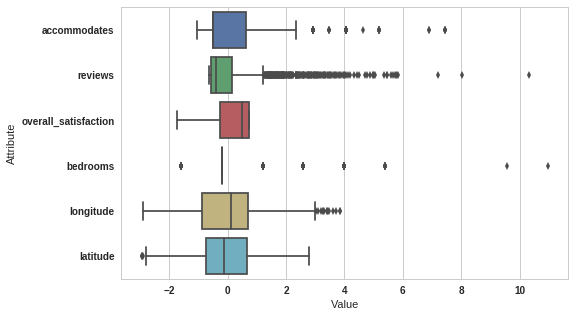

In [155]:
# plt.boxplot(x,vert=False);
plotNorm = sns.boxplot(data=x[:,0:6], orient='h')
plotNorm.set_yticklabels(data_p1_coded.columns);
# plotNorm.figure.set_size_inches(10,5)
plotNorm.set_xlabel('Value')
plotNorm.set_ylabel('Attribute')
plotNorm.figure.set_size_inches(8,5)

In [156]:
covMatrix = x.transpose().dot(x)/x.shape[0]
(eigenVals,eigneVectors)= np.linalg.eig(covMatrix)
idx = eigenVals.argsort()[::-1]   
eigenVals = eigenVals[idx]
eigneVectors = eigneVectors[:,idx]
totalEigenval = []
tmp = 0
eigenvalSum = sum(eigenVals)
for val in eigenVals:
    tmp += val
    totalEigenval.append(tmp/eigenvalSum)
print(totalEigenval)

[0.13734392387354266, 0.24775993021826465, 0.32416821267876395, 0.38168273911985051, 0.43612872150516241, 0.48751420901027775, 0.53238430253071745, 0.57667432694041543, 0.62067517999486765, 0.6643663044618151, 0.7080341696807777, 0.75157143417985084, 0.79501547470829292, 0.83781545817962622, 0.87842580194470521, 0.91692621890165638, 0.95370618502097826, 0.98153408396319741, 0.99363350399817352, 0.99999999999999967, 0.99999999999999989, 1.0, 1.0]


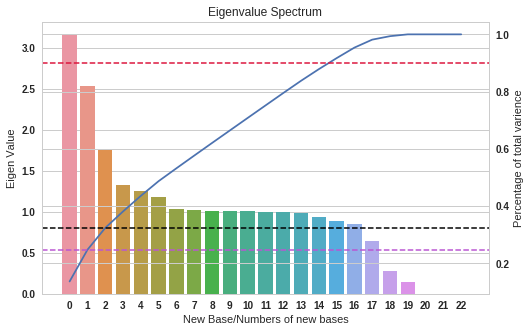

In [157]:
fig, ax1 = plt.subplots()
ploteig = sns.barplot(x=list(range(len(eigenVals))),y=eigenVals, ax=ax1)
plt.title("Eigenvalue Spectrum")
plt.xlabel("New Base/Numbers of new bases")
plt.ylabel("Eigen Value")
ploteig.figure.set_size_inches(8,5)
ax2 = ax1.twinx()
ax2.plot(totalEigenval)
ax2.set_ylabel('Percentage of total varience')
ax2.axhline(y = .9, linewidth=1.5, color = 'crimson',linestyle="--", label = '0.9')
ax2.axhline(y = totalEigenval[1], linewidth=1.5, color = 'mediumorchid',linestyle="--", label = 'Preserved variance in 2D Projection')
ax2.axhline(y = totalEigenval[2], linewidth=1.5, color = 'black',linestyle="--", label = 'Preserved variance in 3D Projection')
plt.savefig('images/eigenvalues1.png', format='png', dpi=200)

In [158]:
col = data_p1_coded.columns
for eigneVector in eigneVectors[:,0:3].transpose():
    idx = abs(eigneVector).argsort()[::-1]  
    print(col[idx], eigneVector[idx])

Index(['borough_Manhattan', 'borough_Brooklyn', 'latitude',
       'property_type_House', 'property_type_Apartment', 'longitude',
       'room_type_Private room', 'room_type_Entire home/apt',
       'property_type_Townhouse', 'bedrooms', 'property_type_Loft',
       'accommodates', 'property_type_Guesthouse', 'property_type_Condominium',
       'property_type_Dorm', 'overall_satisfaction', 'property_type_Timeshare',
       'property_type_Bed & Breakfast', 'property_type_Hostel',
       'room_type_Shared room', 'property_type_Other',
       'property_type_Boutique hotel', 'reviews'],
      dtype='object') [-0.51189794  0.51189794 -0.41638528  0.26860226 -0.26375291  0.25788648
  0.19774718 -0.19536181  0.07404652  0.06345469  0.06100039 -0.03511469
  0.02566127  0.02375218  0.02360833 -0.02127087 -0.01486923  0.00589405
 -0.00572554 -0.00565397  0.00516948 -0.00293621 -0.00200778]
Index(['accommodates', 'room_type_Entire home/apt', 'room_type_Private room',
       'bedrooms', 'property_

In [161]:
# x is actually X^T
X_tilde1 = x.dot(eigneVectors[:,:3])
X_tilde1 = pd.DataFrame(X_tilde1,columns=['x','y','z'])
X_tilde1['price'] = p1_price

In [162]:
def priceLabel(price):
    if price < 85:
        return 'low'
    elif price >= 149:
        return 'high'
    else:
        return 'middle'
X_tilde1['label'] = X_tilde1['price'].map(priceLabel)
color1 = {'high':'mediumorchid','middle':'darkorange', 'low':'deepskyblue'}
labels1 = ['high', 'middle', 'low']
dfList = []
for label in labels1:
    dfList.append(X_tilde1[X_tilde1.label.map(lambda x: x == label)])

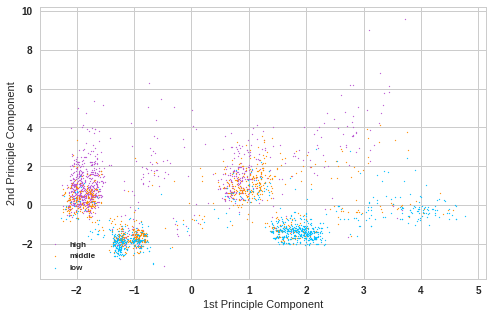

In [163]:
for (df, label) in zip(dfList, labels1):
    pca1_2d = plt.scatter(x = df.x, y = df.y, s = 1, c=color1[label], label=label)
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.legend(loc = 'lower left',prop={'size':8})
pca1_2d.figure.set_size_inches(8,5)
plt.savefig('images/pca1-2d.png', format='png', dpi=200)

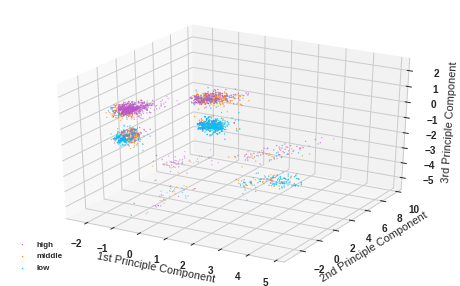

In [164]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for (df, label) in zip(dfList, labels1):
    pca1_3d = ax.scatter(df.x,df.y,df.z, s = 1, c=color1[label], label=label)
plt.legend(loc = 'lower left',prop={'size':8})
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
pca1_3d.figure.set_size_inches(8,5)
plt.savefig('images/pca1-3d.png', format='png', dpi=200)
plt.show()

### Label overall satisfiction

In [165]:
display(data.head())

,room_type,borough,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,property_type
0,Entire home/apt,Manhattan,4,72,4.5,2.0,195.0,-73.987723,40.720270,Apartment
1,Private room,Brooklyn,1,73,4.5,1.0,84.0,-73.962531,40.713996,Apartment
2,Private room,Brooklyn,2,5,5.0,1.0,80.0,-73.942833,40.705396,Apartment
3,Private room,Brooklyn,3,1,0.0,1.0,69.0,-73.937552,40.713160,House
4,Entire home/apt,Manhattan,2,10,4.5,2.0,200.0,-74.001367,40.728629,Apartment


In [166]:
overall_sa = data["overall_satisfaction"]
data_p2 = data.drop(axis=1,labels=["overall_satisfaction"])

In [167]:
data_p2.head()

,room_type,borough,accommodates,reviews,bedrooms,price,longitude,latitude,property_type
0,Entire home/apt,Manhattan,4,72,2.0,195.0,-73.987723,40.720270,Apartment
1,Private room,Brooklyn,1,73,1.0,84.0,-73.962531,40.713996,Apartment
2,Private room,Brooklyn,2,5,1.0,80.0,-73.942833,40.705396,Apartment
3,Private room,Brooklyn,3,1,1.0,69.0,-73.937552,40.713160,House
4,Entire home/apt,Manhattan,2,10,2.0,200.0,-74.001367,40.728629,Apartment


In [168]:
data_p2_coded = pd.get_dummies(data_p2)

In [169]:
data2 = np.array(data_p2_coded)
x2 = (data1-data1.mean(axis=0))/data1.std(axis=0)

In [170]:
covMatrix2 = x2.transpose().dot(x)/x2.shape[0]
(eigenVals2,eigneVectors2)= np.linalg.eig(covMatrix2)
idx = eigenVals2.argsort()[::-1]   
eigenVals2 = eigenVals2[idx]
eigneVectors2 = eigneVectors2[:,idx]
totalEigenval2 = []
tmp = 0
eigenvalSum2 = sum(eigenVals2)
for val in eigenVals2:
    tmp += val
    totalEigenval2.append(tmp/eigenvalSum2)
print(totalEigenval)

[0.13734392387354266, 0.24775993021826465, 0.32416821267876395, 0.38168273911985051, 0.43612872150516241, 0.48751420901027775, 0.53238430253071745, 0.57667432694041543, 0.62067517999486765, 0.6643663044618151, 0.7080341696807777, 0.75157143417985084, 0.79501547470829292, 0.83781545817962622, 0.87842580194470521, 0.91692621890165638, 0.95370618502097826, 0.98153408396319741, 0.99363350399817352, 0.99999999999999967, 0.99999999999999989, 1.0, 1.0]


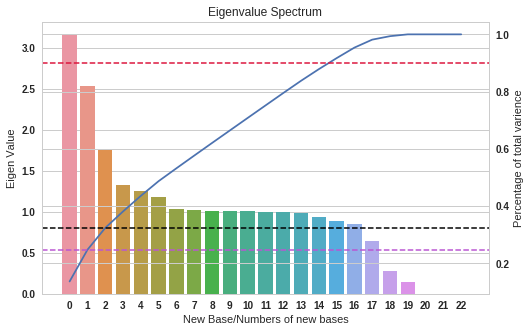

In [171]:
fig, ax1 = plt.subplots()
ploteig = sns.barplot(x=list(range(len(eigenVals2))),y=eigenVals2, ax=ax1)
plt.title("Eigenvalue Spectrum")
plt.xlabel("New Base/Numbers of new bases")
plt.ylabel("Eigen Value")
ploteig.figure.set_size_inches(8,5)
ax2 = ax1.twinx()
ax2.plot(totalEigenval)
ax2.set_ylabel('Percentage of total varience')
ax2.axhline(y = .9, linewidth=1.5, color = 'crimson',linestyle="--", label = '0.9')
ax2.axhline(y = totalEigenval[1], linewidth=1.5, color = 'mediumorchid',linestyle="--", label = 'Preserved variance in 2D Projection')
ax2.axhline(y = totalEigenval[2], linewidth=1.5, color = 'black',linestyle="--", label = 'Preserved variance in 3D Projection')
plt.savefig('images/eigenvalues2.png', format='png', dpi=200)

In [172]:
col2 = data_p2_coded.columns
for eigneVector2 in eigneVectors2[:,0:3].transpose():
    idx = abs(eigneVector2).argsort()[::-1]  
    print(col2[idx], eigneVector2[idx])

Index(['borough_Brooklyn', 'borough_Manhattan', 'latitude',
       'property_type_House', 'property_type_Apartment', 'longitude',
       'room_type_Private room', 'room_type_Entire home/apt',
       'property_type_Townhouse', 'price', 'property_type_Loft',
       'accommodates', 'property_type_Guesthouse', 'property_type_Condominium',
       'property_type_Dorm', 'bedrooms', 'property_type_Timeshare',
       'property_type_Bed & Breakfast', 'property_type_Hostel',
       'room_type_Shared room', 'property_type_Other',
       'property_type_Boutique hotel', 'reviews'],
      dtype='object') [-0.51189794  0.51189794  0.41638528 -0.26860226  0.26375291 -0.25788648
 -0.19774718  0.19536181 -0.07404652 -0.06345469 -0.06100039  0.03511469
 -0.02566127 -0.02375218 -0.02360833  0.02127087  0.01486923 -0.00589405
  0.00572554  0.00565397 -0.00516948  0.00293621  0.00200778]
Index(['accommodates', 'room_type_Entire home/apt', 'room_type_Private room',
       'price', 'property_type_Apartment', '

In [173]:
# x is actually X^T
X_tilde2 = x.dot(eigneVectors[:,:3])
X_tilde2 = pd.DataFrame(X_tilde1,columns=['x','y','z'])
X_tilde2['overall'] = overall_sa

In [174]:
X_tilde2.overall.value_counts()

5.0    1009
4.5     847
0.0     675
4.0     160
3.5      27
3.0       7
1.5       1
2.0       1
Name: overall, dtype: int64

In [175]:
print(X_tilde2.overall.value_counts())
def overallLabel(overall):
    if overall <= 4:
        return 'low'
    elif overall == 4.5:
        return 'median'
    else:
        return 'high'
X_tilde2['label'] = X_tilde2['overall'].map(overallLabel)
color2 = {'high':'mediumorchid','median':'darkorange', 'low':'deepskyblue'}
labels2 = ['high', 'median', 'low']
dfList2 = []
for label in labels2:
    dfList2.append(X_tilde2[X_tilde2.label.map(lambda x: x == label)])

5.0    1009
4.5     847
0.0     675
4.0     160
3.5      27
3.0       7
1.5       1
2.0       1
Name: overall, dtype: int64


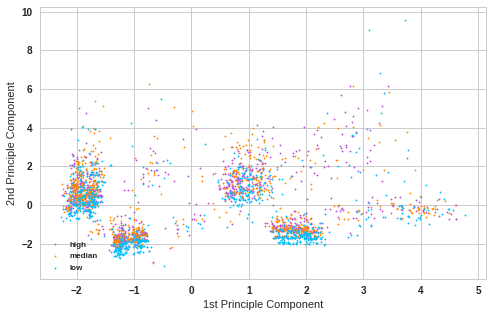

In [176]:
for (df, label) in zip(dfList2, labels2):
    pca1_2d = plt.scatter(x = df.x, y = df.y, s = 2, c=color2[label], label=label)
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.legend(loc = 'lower left',prop={'size':8})
pca1_2d.figure.set_size_inches(8,5)
plt.savefig('images/pca2-2d.png', format='png', dpi=200)

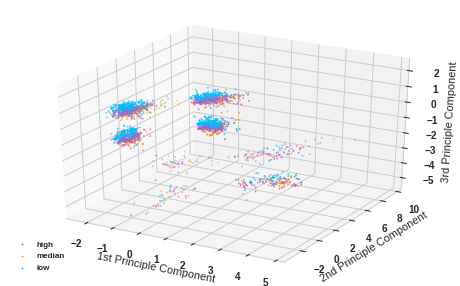

In [177]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for (df, label) in zip(dfList2, labels2):
    pca1_3d = ax.scatter(df.x,df.y,df.z, s = 2, c=color2[label], label=label)
plt.legend(loc = 'lower left',prop={'size':8})
ax.set_xlabel("1st Principle Component")
ax.set_ylabel("2nd Principle Component")
ax.set_zlabel("3rd Principle Component")
pca1_3d.figure.set_size_inches(8,5)
plt.savefig('images/pca2-3d.png', format='png', dpi=200)
plt.show()

### Comparision of two borough

In [178]:
X_tilde1_b1 = X_tilde1[data.borough.map(lambda x: x == 'Manhattan')]
X_tilde1_b2 = X_tilde1[data.borough.map(lambda x: x == 'Brooklyn')]

In [179]:
X_tilde1.head()

,x,y,z,price,label
0,-1.607043,1.735547,-0.045296,195.0,high
1,1.515283,-1.393632,0.424074,84.0,low
2,1.762335,-1.345503,0.717266,80.0,low
3,3.672933,-0.420610,-2.144002,69.0,low
4,-1.768275,0.981213,0.222492,200.0,high


In [180]:
labels = ['high', 'middle', 'low']
dfList3_1 = []
dfList3_2 = []
for label in labels:
    dfList3_1.append(X_tilde1_b1[X_tilde1_b1.label.map(lambda x: x == label)])
    dfList3_2.append(X_tilde1_b2[X_tilde1_b2.label.map(lambda x: x == label)])    

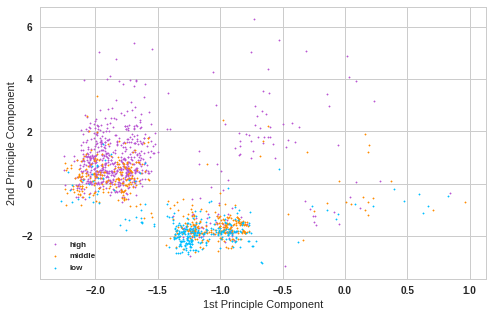

In [181]:
for (df, label) in zip(dfList3_1, labels):
    pca1_2d = plt.scatter(x = df.x, y = df.y, s = 2, c=color1[label], label=label)
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.legend(loc = 'lower left',prop={'size':8})
pca1_2d.figure.set_size_inches(8,5)
plt.savefig('images/pca3-1.png', format='png', dpi=200)

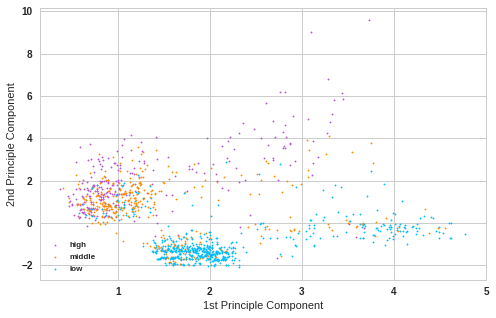

In [182]:
for (df, label) in zip(dfList3_2, labels):
    pca1_2d = plt.scatter(x = df.x, y = df.y, s = 2, c=color1[label], label=label)
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.legend(loc = 'lower left',prop={'size':8})
pca1_2d.figure.set_size_inches(8,5)
plt.savefig('images/pca3-2.png', format='png', dpi=200)

### 2D-Projection

In [183]:
data_coded = pd.get_dummies(data)
dataNomolizaed = (data_coded - data_coded.mean())/data_coded.std()
dataNomolizaed['pricelabel'] = X_tilde1.label
dataNomolizaed['satisfictionLabel'] = X_tilde2.label
display(dataNomolizaed.head())

,accommodates,reviews,overall_satisfaction,bedrooms,price,longitude,latitude,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,...,property_type_Dorm,property_type_Guesthouse,property_type_Hostel,property_type_House,property_type_Loft,property_type_Other,property_type_Timeshare,property_type_Townhouse,pricelabel,satisfictionLabel
0,0.643430,1.493492,0.475600,1.198084,0.518257,-0.910423,-0.181929,0.927964,-0.890286,-0.14477,...,-0.019149,-0.03318,-0.027086,-0.260215,-0.168137,-0.069197,-0.03318,-0.130964,high,median
1,-1.061201,1.523321,0.475600,-0.196357,-0.521738,0.079362,-0.301937,-1.077233,1.122823,-0.14477,...,-0.019149,-0.03318,-0.027086,-0.260215,-0.168137,-0.069197,-0.03318,-0.130964,low,median
2,-0.492991,-0.505017,0.719757,-0.196357,-0.559215,0.853290,-0.466435,-1.077233,1.122823,-0.14477,...,-0.019149,-0.03318,-0.027086,-0.260215,-0.168137,-0.069197,-0.03318,-0.130964,low,high
3,0.075220,-0.624331,-1.721812,-0.196357,-0.662278,1.060779,-0.317927,-1.077233,1.122823,-0.14477,...,-0.019149,-0.03318,-0.027086,3.841561,-0.168137,-0.069197,-0.03318,-0.130964,low,low
4,-0.492991,-0.355875,0.475600,1.198084,0.565104,-1.446492,-0.022040,0.927964,-0.890286,-0.14477,...,-0.019149,-0.03318,-0.027086,-0.260215,-0.168137,-0.069197,-0.03318,-0.130964,high,median


In [184]:
data.room_type.value_counts()

Entire home/apt    1465
Private room       1206
Shared room          56
Name: room_type, dtype: int64

In [185]:
dfListPair1 = []
dfListPair2 = []
dfListPair4 = []
dfListPair3 = []
marker1 = {'low':'2','middle':'1','high':'3'}
labels3 = ['Manhattan', 'Brooklyn']
labels4 = ['Entire home/apt', 'Private room', 'Shared room']
for label in labels1:
    dfListPair1.append(data[X_tilde1.label.map(lambda x: x == label)])
for label in labels2:
    dfListPair2.append(data[X_tilde2.label.map(lambda x: x == label)])
for label in labels3:
    dfListPair3.append(data[data.borough.map(lambda x: x == label)])
for label in labels4:
    dfListPair4.append(data[data.room_type.map(lambda x: x == label)])

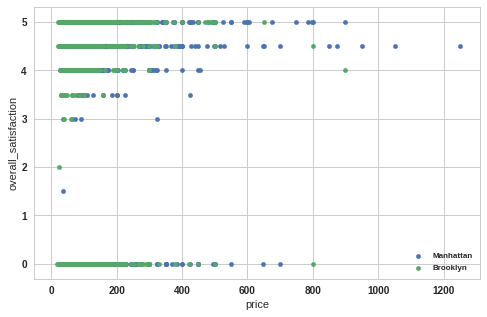

In [186]:
for (df, label) in zip(dfListPair3, labels3):
    pairPlt = plt.scatter(x = df.price, y = df.overall_satisfaction, s = 20, label=label)
plt.xlabel("price")
plt.ylabel("overall_satisfaction")
plt.legend(loc = 'lower right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-over-price1.png', format='png', dpi=200)

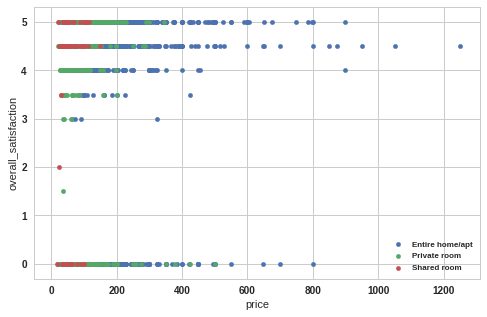

In [187]:
for (df, label) in zip(dfListPair4, labels4):
    pairPlt = plt.scatter(x = df.price, y = df.overall_satisfaction, s = 20, label=label)
plt.xlabel("price")
plt.ylabel("overall_satisfaction")
plt.legend(loc = 'lower right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-over-price2.png', format='png', dpi=200)

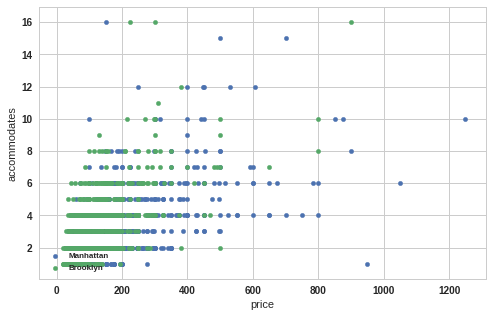

In [188]:
for (df, label) in zip(dfListPair3, labels3):
    pairPlt = plt.scatter(x = df.price, y = df.accommodates, s = 20, label=label)
plt.xlabel("price")
plt.ylabel("accommodates")
plt.legend(loc = 'lower left',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-acc-price.png', format='png', dpi=200)

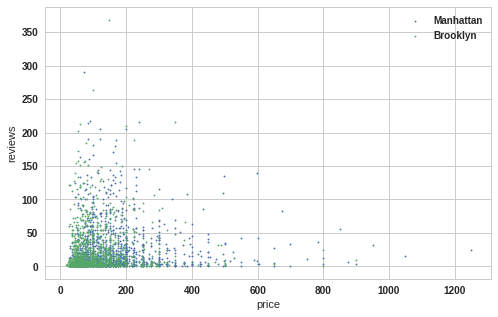

In [189]:
for (df, label) in zip(dfListPair3, labels3):
    pairPlt = plt.scatter(x = df.price, y = df.reviews, s =2, label=label)
plt.xlabel("price")
plt.ylabel("reviews")
plt.legend(loc = 'upper right',prop={'size':10})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-reviews-price1.png', format='png', dpi=200)

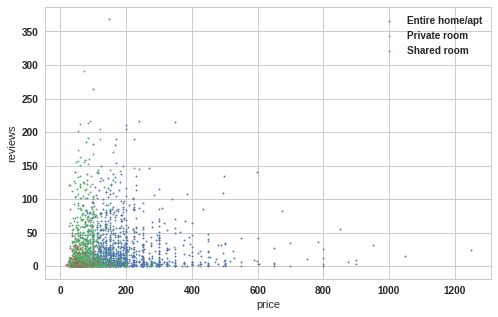

In [190]:
for (df, label) in zip(dfListPair4, labels4):
    pairPlt = plt.scatter(x = df.price, y = df.reviews, s =2, label=label)
plt.xlabel("price")
plt.ylabel("reviews")
plt.legend(loc = 'upper right',prop={'size':10})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-reviews-price2.png', format='png', dpi=200)

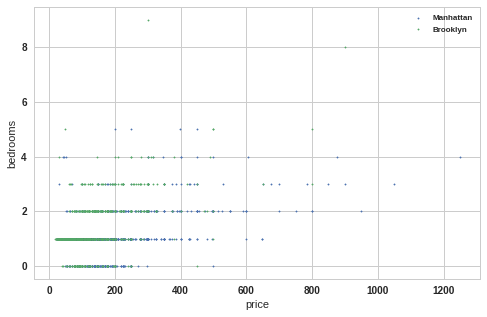

In [191]:
for (df, label) in zip(dfListPair3, labels3):
    pairPlt = plt.scatter(x = df.price, y = df.bedrooms, s = 2, label=label)
plt.xlabel("price")
plt.ylabel("bedrooms")
plt.legend(loc = 'upper right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-bedrooms-price.png', format='png', dpi=200)

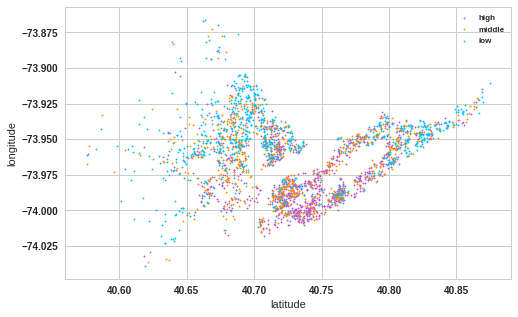

In [192]:
for (df, label) in zip(dfListPair1, labels1):
    pairPlt = plt.scatter(x = df.latitude, y = df.longitude, s = 2,color = color1[label], label=label)
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.legend(loc = 'upper right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-bedrooms-price.png', format='png', dpi=200)

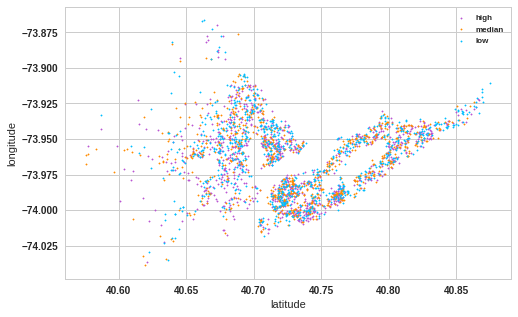

In [193]:
for (df, label) in zip(dfListPair2, labels2):
    pairPlt = plt.scatter(x = df.latitude, y = df.longitude, s = 2,color = color2[label], label=label)
plt.xlabel("latitude")
plt.ylabel("longitude")
plt.legend(loc = 'upper right',prop={'size':8})
pairPlt.figure.set_size_inches(8,5)
plt.savefig('images/pair-bedrooms-price.png', format='png', dpi=200)

### SOM of the dataset

In [194]:
dataNomolizaed.columns

Index(['accommodates', 'reviews', 'overall_satisfaction', 'bedrooms', 'price',
       'longitude', 'latitude', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'borough_Brooklyn',
       'borough_Manhattan', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boutique hotel',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Timeshare', 'property_type_Townhouse', 'pricelabel',
       'satisfictionLabel'],
      dtype='object')

In [302]:
somdata1df = dataNomolizaed.drop(axis=1, labels=['price', 'pricelabel', 'satisfictionLabel'])
somdata1 = np.array(somdata1df)
print(somdata1.shape)

(2727, 23)


## SOM
#### Maybe need more extreme labelling

In [298]:
som = MiniSom(30, 30, 23, sigma=1.4, learning_rate=0.9) 
som.train_random(somdata1,800) # trains the SOM with 100 iterations

In [311]:
som.weights[(1,1)]

array([-0.07989883, -0.16151004,  0.24416535, -0.26059304,  0.08612082,
       -0.1967889 ,  0.39644606, -0.38034901, -0.06184869,  0.46706326,
       -0.46706326,  0.16497797, -0.02591365, -0.0081811 , -0.04271432,
       -0.00818106, -0.01417522, -0.01157188, -0.11116952, -0.07183187,
       -0.02956242, -0.01417524, -0.0559505 ])

In [312]:
print(somdata1df.columns)
codebookVectorijs = [(8,12),(29,26),(22,11),(16,29),(13,22),(7,26)]
for codebookVectorij in codebookVectorijs:
    print(str(codebookVectorij) + ":" + str(som.weights[codebookVectorij]))

Index(['accommodates', 'reviews', 'overall_satisfaction', 'bedrooms',
       'longitude', 'latitude', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'borough_Brooklyn',
       'borough_Manhattan', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boutique hotel',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Timeshare', 'property_type_Townhouse'],
      dtype='object')
(8, 12):[ 0.04798122 -0.04498323 -0.16015248 -0.01188455  0.01808177 -0.12989261
  0.03842022 -0.03328582 -0.01851186  0.12187105 -0.12187157 -0.30497965
 -0.00777534 -0.00245451 -0.01281735 -0.00244868 -0.00425296 -0.00347262
 -0.03334626 -0.02155277 -0.00887003 -0.00425265  0.90835042]
(29, 26):[ -7.82563467e-04  -7.36849253e-03   4.12352502e-02  -1.16291327e-02
  -5.65750293e-02   9

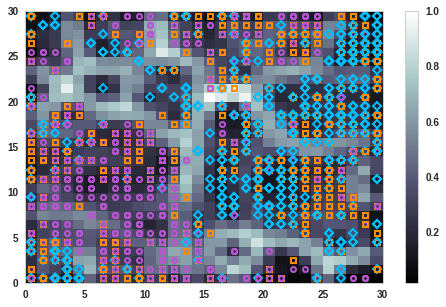

In [249]:
#Plot som
bone()
somplt1 = pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()
plt.savefig('images/som-price.png', format='png', dpi=200)
# use different colors and markers for each label
markers1 = {'high':'o','middle':'s','low':'D'}
for cnt,xx in enumerate(somdata1):
    w = som.winner(xx) # getting the winner
    # place a marker on the winning position for the sample xx
    plot(w[0]+.5,w[1]+.5,markers1[dataNomolizaed.loc[cnt,'pricelabel']],markerfacecolor='None',
         markeredgecolor=color1[dataNomolizaed.loc[cnt,'pricelabel']],markersize=5,markeredgewidth=2)
somplt1.figure.set_size_inches(8,5)
plt.savefig('images/som-price-label.png', format='png', dpi=200)
# axis([191,198,110,117])
show() # show the figure

In [283]:
'''
som = MiniSom(6, 6, 23, sigma=2, learning_rate=0.9) 
som.train_random(somdata1,1500) # trains the SOM with 100 iterations
'''

In [313]:
'''
#Plot som
bone()
somplt1 = pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()
plt.savefig('images/som-price-small.png', format='png', dpi=200)
# use different colors and markers for each label
markers1 = {'high':'o','middle':'s','low':'D'}
# for cnt,xx in enumerate(somdata1):
#     w = som.winner(xx) # getting the winner
#     # place a marker on the winning position for the sample xx
#     plot(w[0]+.5,w[1]+.5,markers1[dataNomolizaed.loc[cnt,'pricelabel']],markerfacecolor='None',
#          markeredgecolor=color1[dataNomolizaed.loc[cnt,'pricelabel']],markersize=1,markeredgewidth=2)
# somplt1.figure.set_size_inches(8,5)
# plt.savefig('images/som-price-small-label.png', format='png', dpi=200)
# axis([191,198,110,117])
show() # show the figure
'''

"\n#Plot som\nbone()\nsomplt1 = pcolor(som.distance_map().T) # plotting the distance map as background\ncolorbar()\nplt.savefig('images/som-price-small.png', format='png', dpi=200)\n# use different colors and markers for each label\nmarkers1 = {'high':'o','middle':'s','low':'D'}\n# for cnt,xx in enumerate(somdata1):\n#     w = som.winner(xx) # getting the winner\n#     # place a marker on the winning position for the sample xx\n#     plot(w[0]+.5,w[1]+.5,markers1[dataNomolizaed.loc[cnt,'pricelabel']],markerfacecolor='None',\n#          markeredgecolor=color1[dataNomolizaed.loc[cnt,'pricelabel']],markersize=1,markeredgewidth=2)\n# somplt1.figure.set_size_inches(8,5)\n# plt.savefig('images/som-price-small-label.png', format='png', dpi=200)\n# axis([191,198,110,117])\nshow() # show the figure\n"

In [198]:
somdata2 = np.array(dataNomolizaed.drop(axis=1, labels=['overall_satisfaction',
                                                        'pricelabel', 'satisfictionLabel']))
print(somdata2.shape)

(2727, 23)


In [237]:
som = MiniSom(40, 40, 23, sigma=2, learning_rate=0.7) 
som.train_random(somdata2,800) # trains the SOM with 100 iterations

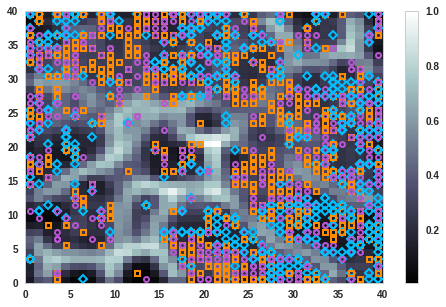

In [240]:
#Plot som
bone()
somplt2 = pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()
plt.savefig('images/som-satisfication.png', format='png', dpi=200)
# use different colors and markers for each label
markers2 = {'high':'o','median':'s','low':'D'}
for cnt,xx in enumerate(somdata2):
    w = som.winner(xx) # getting the winner
    # place a marker on the winning position for the sample xx
    plot(w[0]+.5,w[1]+.5,markers2[dataNomolizaed.loc[cnt,'satisfictionLabel']],markerfacecolor='None',
         markeredgecolor=color2[dataNomolizaed.loc[cnt,'satisfictionLabel']],markersize=5,markeredgewidth=2)
somplt2.figure.set_size_inches(8,5)

plt.savefig('images/som-satisfication-label.png', format='png', dpi=200)
# axis([191,198,110,117])
show() # show the figure

### SOM on the projected Data

In [261]:
data1_projected.shape

(2727, 3)

In [277]:
data1_projected = np.array(X_tilde1.loc[:,['x','y','z']])
som = MiniSom(40, 40, 3, sigma=1.5, learning_rate=0.7) 
som.train_random(data1_projected,500) # trains the SOM with 100 iterations

In [273]:
som.quantization_error(data1_projected) #100

1.576367696661379

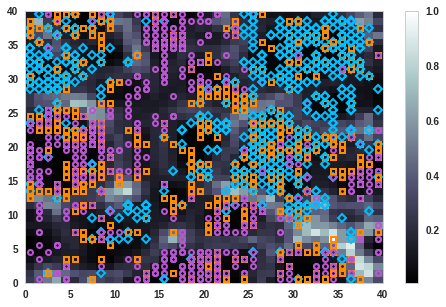

In [278]:
#Plot som
bone()
somplt2 = pcolor(som.distance_map().T) # plotting the distance map as background
colorbar()
plt.savefig('images/som-pca-price.png', format='png', dpi=200)
# use different colors and markers for each label
for cnt,xx in enumerate(data1_projected):
    w = som.winner(xx) # getting the winner
    # place a marker on the winning position for the sample xx
    plot(w[0]+.5,w[1]+.5,markers1[X_tilde1.loc[cnt,'label']],markerfacecolor='None',
         markeredgecolor=color1[X_tilde1.loc[cnt,'label']],markersize=5,markeredgewidth=2)
somplt2.figure.set_size_inches(8,5)

plt.savefig('images/som-pca-price-label.png', format='png', dpi=200)
# axis([191,198,110,117])
show() # show the figure

#### What about codebook vectors?

### Clustering

In [201]:
datanorm = dataNomolizaed.drop(axis=1,labels=["satisfictionLabel","pricelabel"])
print(datanorm.columns)
datanorm1 = datanorm.drop(axis=1,labels=["price"])
datanorm2 = datanorm.drop(axis=1,labels=["overall_satisfaction"])

Index(['accommodates', 'reviews', 'overall_satisfaction', 'bedrooms', 'price',
       'longitude', 'latitude', 'room_type_Entire home/apt',
       'room_type_Private room', 'room_type_Shared room', 'borough_Brooklyn',
       'borough_Manhattan', 'property_type_Apartment',
       'property_type_Bed & Breakfast', 'property_type_Boutique hotel',
       'property_type_Condominium', 'property_type_Dorm',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Timeshare', 'property_type_Townhouse'],
      dtype='object')


In [214]:
def ClusterTest(trainDataset, n_clusters, figureName, plotDataset):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(trainDataset)
    dfListCluster = []
    for label in range(n_clusters):
        dfListCluster.append(plotDataset[pd.Series(kmeans.labels_).map(lambda x: x == label)])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for (df, label) in zip(dfListCluster, range(n_clusters)):
        pca1_3d = ax.scatter(df.x,df.y,df.z, s = 5)
    # plt.legend(loc = 'lower left',prop={'size':8})
    ax.set_xlabel("1st Principle Component")
    ax.set_ylabel("2nd Principle Component")
    ax.set_zlabel("3rd Principle Component")
    pca1_3d.figure.set_size_inches(8,5)
    plt.savefig('images/%s-%d.png' % (figureName, n_clusters) , format='png', dpi=200)
    plt.show()

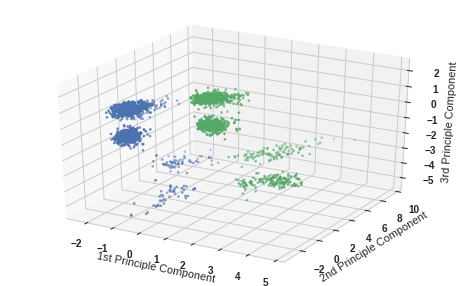

In [215]:
ClusterTest(datanorm1, 2, 'KMeans-trainbywhole',X_tilde1)

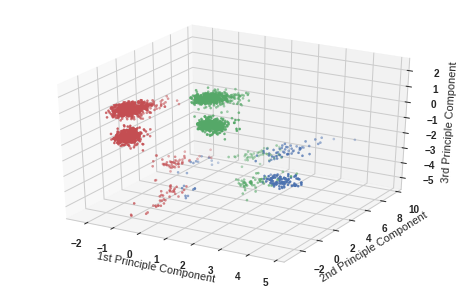

In [216]:
ClusterTest(datanorm1, 3, 'KMeans-trainbywhole',X_tilde1)

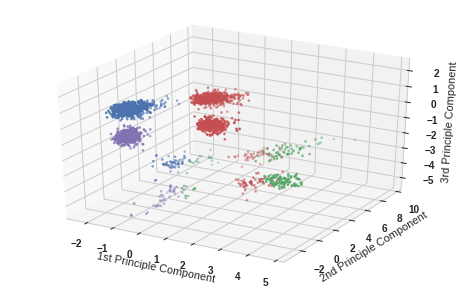

In [217]:
ClusterTest(datanorm1, 4, 'KMeans-trainbywhole',X_tilde1)

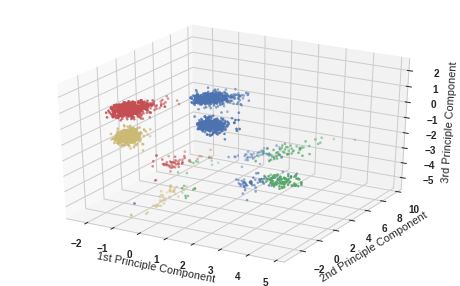

In [219]:
ClusterTest(datanorm1, 5, 'KMeans-trainbywhole',X_tilde1)

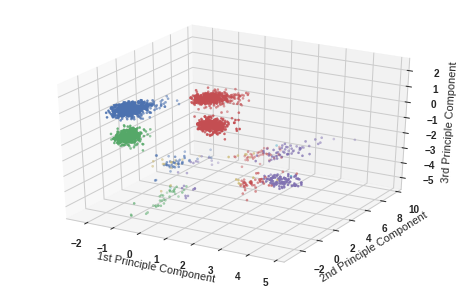

In [220]:
ClusterTest(datanorm1, 6, 'KMeans-trainbywhole',X_tilde1)

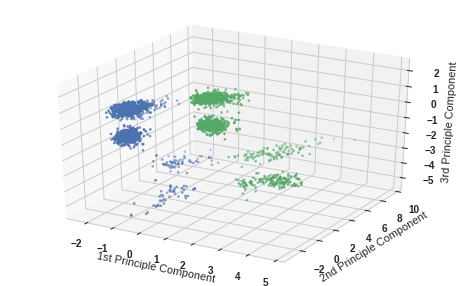

In [221]:
ClusterTest(X_tilde1.loc[:,['x','y','z']], 2, 'KMeans-trainbyPCA',X_tilde1)

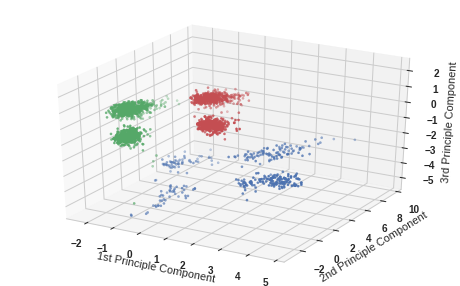

In [222]:
ClusterTest(X_tilde1.loc[:,['x','y','z']], 3, 'KMeans-trainbyPCA',X_tilde1)

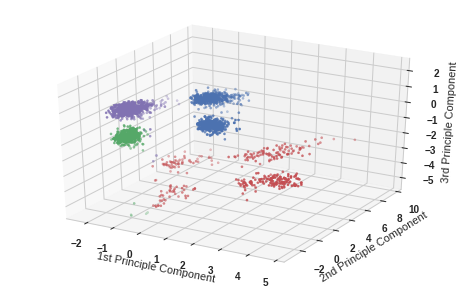

In [223]:
ClusterTest(X_tilde1.loc[:,['x','y','z']], 4, 'KMeans-trainbyPCA',X_tilde1)

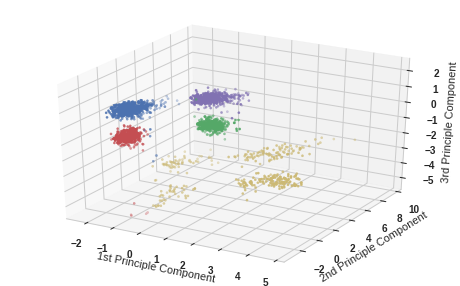

In [224]:
ClusterTest(X_tilde1.loc[:,['x','y','z']], 5, 'KMeans-trainbyPCA',X_tilde1)

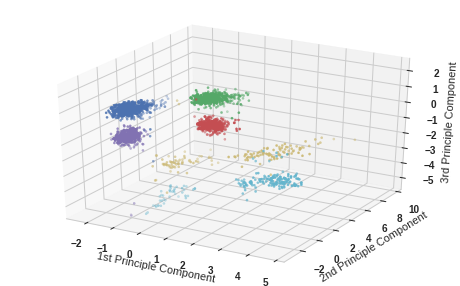

In [225]:
ClusterTest(X_tilde1.loc[:,['x','y','z']], 6, 'KMeans-trainbyPCA',X_tilde1)

In [213]:
X_tilde1.describe()

,x,y,z,price
count,2.727000e+03,2.727000e+03,2.727000e+03,2727.000000
mean,-1.168813e-13,3.792688e-14,-9.512336e-15,139.685735
std,1.777658e+00,1.593895e+00,1.325909e+00,106.731267
min,-2.276517e+00,-3.149826e+00,-5.254649e+00,18.000000
25%,-1.709017e+00,-1.419317e+00,-5.813817e-01,71.500000
50%,-8.150609e-01,2.130703e-02,2.087207e-01,110.000000
75%,1.546120e+00,1.015523e+00,9.203416e-01,175.000000
max,4.768823e+00,9.563861e+00,2.230824e+00,1250.000000
